Espérance théorique de Z = (E[X], E[Y]) = [20 60]


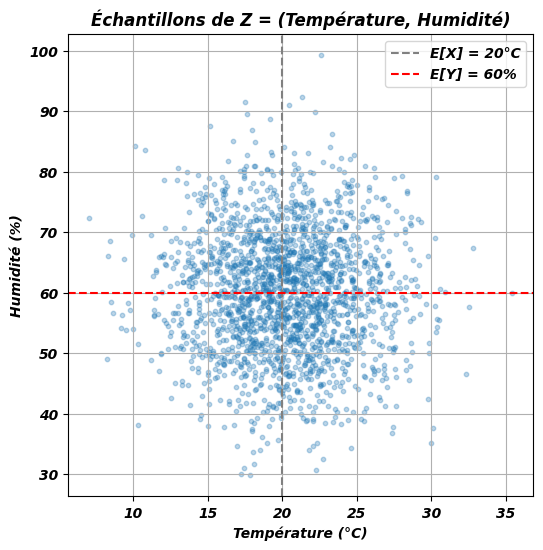

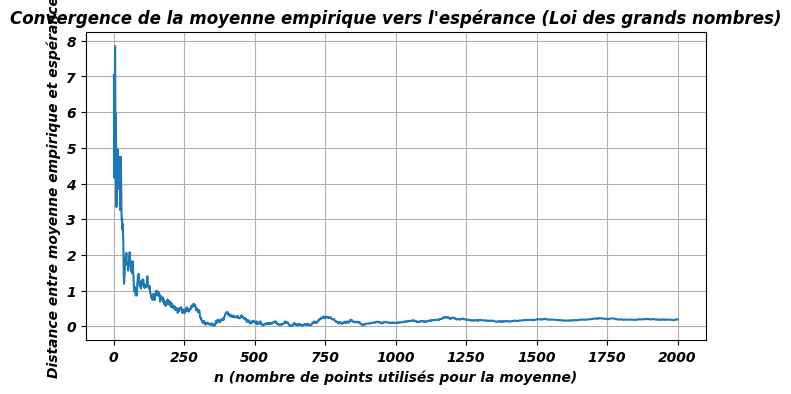

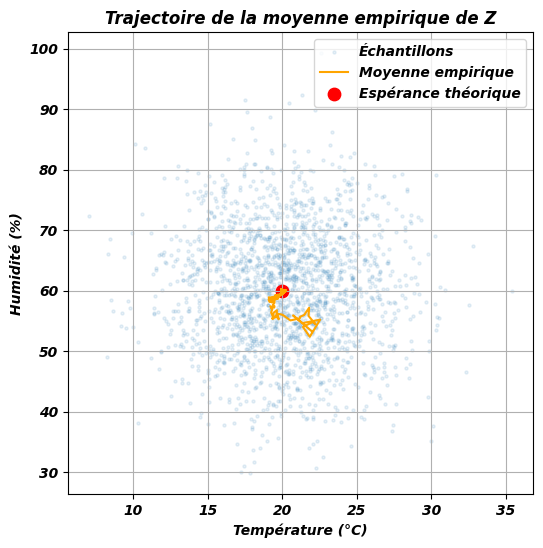

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1) Définition de la loi de Z
# ============================

# Z = (X, Y)
# X = température (°C) ~ N(20, 4^2)
# Y = humidité (%) ~ N(60, 10^2)

np.random.seed(42)  # pour rendre les résultats reproductibles

mu_x = 20   # moyenne de X (°C)
mu_y = 60   # moyenne de Y (%)

sigma_x = 4   # écart-type de X
sigma_y = 10  # écart-type de Y

# Espérance théorique de Z = (E[X], E[Y])
E_Z = np.array([mu_x, mu_y])
print("Espérance théorique de Z = (E[X], E[Y]) =", E_Z)

# ============================
# 2) Échantillonnage de Z
# ============================

N = 2000  # nombre total de points

# On génère N valeurs de X et N valeurs de Y
X_samples = np.random.normal(loc=mu_x, scale=sigma_x, size=N)
Y_samples = np.random.normal(loc=mu_y, scale=sigma_y, size=N)

# Nuage de points des échantillons de Z
plt.figure(figsize=(6, 6))
plt.scatter(X_samples, Y_samples, alpha=0.3, s=10)
plt.axvline(mu_x, color='gray', linestyle='--', label='E[X] = 20°C')
plt.axhline(mu_y, color='red', linestyle='--', label='E[Y] = 60%')
plt.xlabel("Température (°C)")
plt.ylabel("Humidité (%)")
plt.title("Échantillons de Z = (Température, Humidité)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# 3) Loi des grands nombres : convergence de la moyenne
# ==========================================================

empirical_means = []   # stocker les moyennes (X̄_n, Ȳ_n)
distances = []         # distances entre moyenne empirique et E[Z]

for n in range(1, N + 1):
    mean_x_n = X_samples[:n].mean()
    mean_y_n = Y_samples[:n].mean()
    mean_n = np.array([mean_x_n, mean_y_n])
    empirical_means.append(mean_n)

    # distance euclidienne || mean_n - E_Z ||
    d = np.linalg.norm(mean_n - E_Z)
    distances.append(d)

empirical_means = np.array(empirical_means)

# Courbe de la distance vers 0
plt.figure(figsize=(8, 4))
plt.plot(range(1, N + 1), distances)
plt.xlabel("n (nombre de points utilisés pour la moyenne)")
plt.ylabel("Distance entre moyenne empirique et espérance")
plt.title("Convergence de la moyenne empirique vers l'espérance (Loi des grands nombres)")
plt.grid(True)
plt.show()

# (Optionnel) visualiser la trajectoire de la moyenne empirique dans le plan (X, Y)
plt.figure(figsize=(6, 6))
plt.scatter(X_samples, Y_samples, alpha=0.1, s=5, label="Échantillons")
plt.plot(empirical_means[:, 0], empirical_means[:, 1], color='orange', label="Moyenne empirique")
plt.scatter([E_Z[0]], [E_Z[1]], color='red', s=80, label="Espérance théorique")
plt.xlabel("Température (°C)")
plt.ylabel("Humidité (%)")
plt.title("Trajectoire de la moyenne empirique de Z")
plt.legend()
plt.grid(True)
plt.show()
